In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("Số lượng mẫu dữ liệu:", len(X))
print("Số chiều của 1 mẫu dữ liệu:", X.shape[1])

Số lượng mẫu dữ liệu: 70000
Số chiều của 1 mẫu dữ liệu: 784


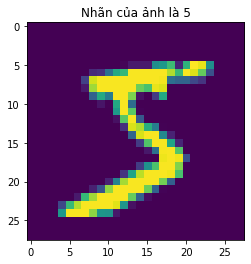

In [15]:
def show_data_example(xi, yi):
    plt.imshow(xi.reshape(28, 28))
    plt.title(f'Nhãn của ảnh là {yi}')
    plt.show()
show_data_example(np.array(list(X.iloc[0, :])), y[0])

In [17]:
X_arr = X.to_numpy()
y_arr = y.to_numpy()

In [39]:
mnist_train = {
    'data': X_arr[:1000, :],
    'target': y_arr[:1000]
}

mnist_test = {
    'data': X_arr[60000:60400, :],
    'target': y_arr[60000:60400]
}

In [40]:
y_train_df = pd.DataFrame(data = mnist_train['target'], columns = ['class'])
y_test_df = pd.DataFrame(data = mnist_test['target'], columns = ['class'])

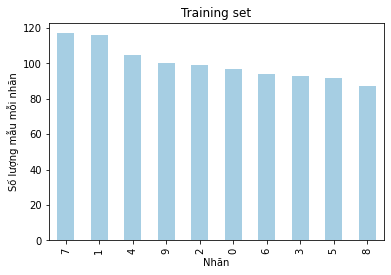

In [41]:
y_train_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu mỗi nhãn')
plt.title('Training set')
plt.show()

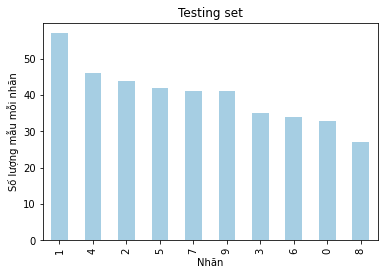

In [42]:
y_test_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu mỗi nhãn')
plt.title('Testing set')
plt.show()

In [43]:
optimal_k = 1
optimal_error = 1
error_rate_list = []
for quantity in range(1, 51):
    knn_clf = KNeighborsClassifier(n_neighbors=quantity)
    knn_clf.fit(mnist_train['data'], mnist_train['target'])
    y_pred = knn_clf.predict(mnist_test['data'])
    error = np.mean(y_pred != mnist_test['target'])
    if error < optimal_error:
        optimal_error = error
        optimal_k = quantity
    error_rate_list.append(error)

Giá trị k tối ưu KNN là 4 với 16.25% mẫu test đoán sai


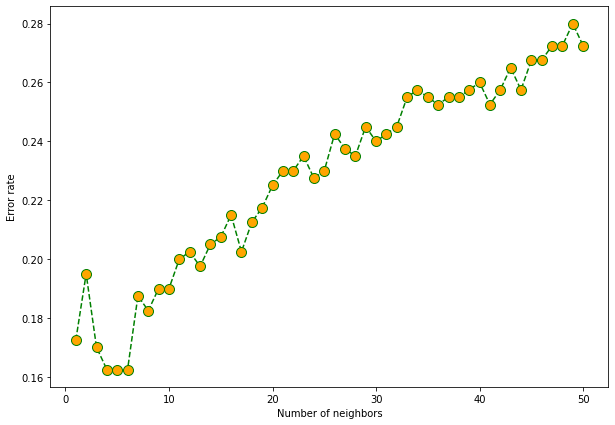

In [44]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 51), error_rate_list, color="green", linestyle="dashed", marker="o", markerfacecolor="orange", markersize=10)
plt.ylabel("Error rate")
plt.xlabel("Number of neighbors")
print(f'Giá trị k tối ưu KNN là {optimal_k} với {optimal_error * 100}% mẫu test đoán sai')

In [45]:
from metric_learn import LMNN

In [46]:
lmnn = LMNN(k=5, learn_rate=1e-6)
lmnn.fit(mnist_train['data'], mnist_train['target'])
knn_lmnn_clf = KNeighborsClassifier(metric=lmnn.get_metric())
knn_lmnn_clf.fit(mnist_train['data'], mnist_train['target'])
y_pred = knn_lmnn_clf.predict(mnist_test['data'])
print(f'Sử dụng giải thuật LMNN cho KNN dự đoán {optimal_error * 100}% mẫu test đoán sai')

Sử dụng giải thuật LMNN cho KNN dự đoán 16.25% mẫu test đoán sai
